In [7]:
from nuimages import NuImages

dataroot = 'D:/nulimages_data/nuimages-v1.0-all-metadata'

nuim = NuImages(dataroot= dataroot, version='v1.0-train', verbose=True, lazy=True)

Loading nuImages tables for version v1.0-train...
Done loading in 0.000 seconds (lazy=True).


In [14]:
from PIL import Image 
import matplotlib.pyplot as plt

import numpy as np

import os
mask_path = 'D:/nulimages_data/validate/mask/'
mask_files = os.listdir(mask_path)
for sample in nuim.sample:
    sample_token = nuim.get('sample_data', sample['key_camera_token'])
    filename = sample_token['filename'].split('/')[-1].split('.')[0] + '.png'

    cityscape_colormap = np.array([[0, 0, 0], [0, 0, 0], [150, 5, 61], [150, 5, 61], [150, 5, 61], [150, 5, 61], [150, 5, 61], [150, 5, 61], [150, 5, 61], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [255, 245, 0], [255, 0, 245], [255, 0, 245], [0, 102, 200], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [163, 0, 255], [0, 0, 0], [255, 0, 20],[0,0,0],[0,0,0]])


    # Check if there is file name contains CAM_FRONT and len(.split(_)) ==2
    condition = "BACK" in filename and "LEFT" not in filename and "RIGHT" not in filename
    if not condition:
        continue
    # Save the semantic mask as png
    semantic_mask, instance_mask = nuim.get_segmentation(sample['key_camera_token'])

    # Initialize an empty RGB image with the same height and width as the semantic mask
    rgb_image = np.zeros((semantic_mask.shape[0], semantic_mask.shape[1], 3), dtype=np.uint8)

    # Map each value in the semantic mask to its corresponding RGB color
    for value in np.unique(semantic_mask):
        if value > len(cityscape_colormap) - 1:
            mapping = np.array([0, 0, 0])
        else:
            mapping = cityscape_colormap[value]
        rgb_image[semantic_mask == value] = mapping


    # Create a figure with a specific size and no axis
    fig = plt.figure(frameon=False)
    fig.set_size_inches(1600 / fig.dpi, 900 / fig.dpi)

    # Remove padding and margin
    ax = plt.Axes(fig, [0., 0., 1., 1.])
    ax.set_axis_off()
    fig.add_axes(ax)

    # Display and save the semantic mask
    ax.imshow(semantic_mask, aspect='auto')
    plt.savefig(f'{mask_path}/{filename}', dpi=fig.dpi)
    plt.close(fig)


KeyboardInterrupt: 

In [5]:
# check for duplicates
import os
mask_path = 'D:/nulimages_data/train/mask/'
mask_files = os.listdir(mask_path)
mask_files = [file.split('.')[0] for file in mask_files]
mask_files_set = set(mask_files)
print(len(mask_files))
print(len(mask_files_set))


13187
13187


Loaded 25 category(s) in 0.017s,
Loaded 73755 surface_ann(s) in 1.333s,
Loaded 557715 object_ann(s) in 4.246s,


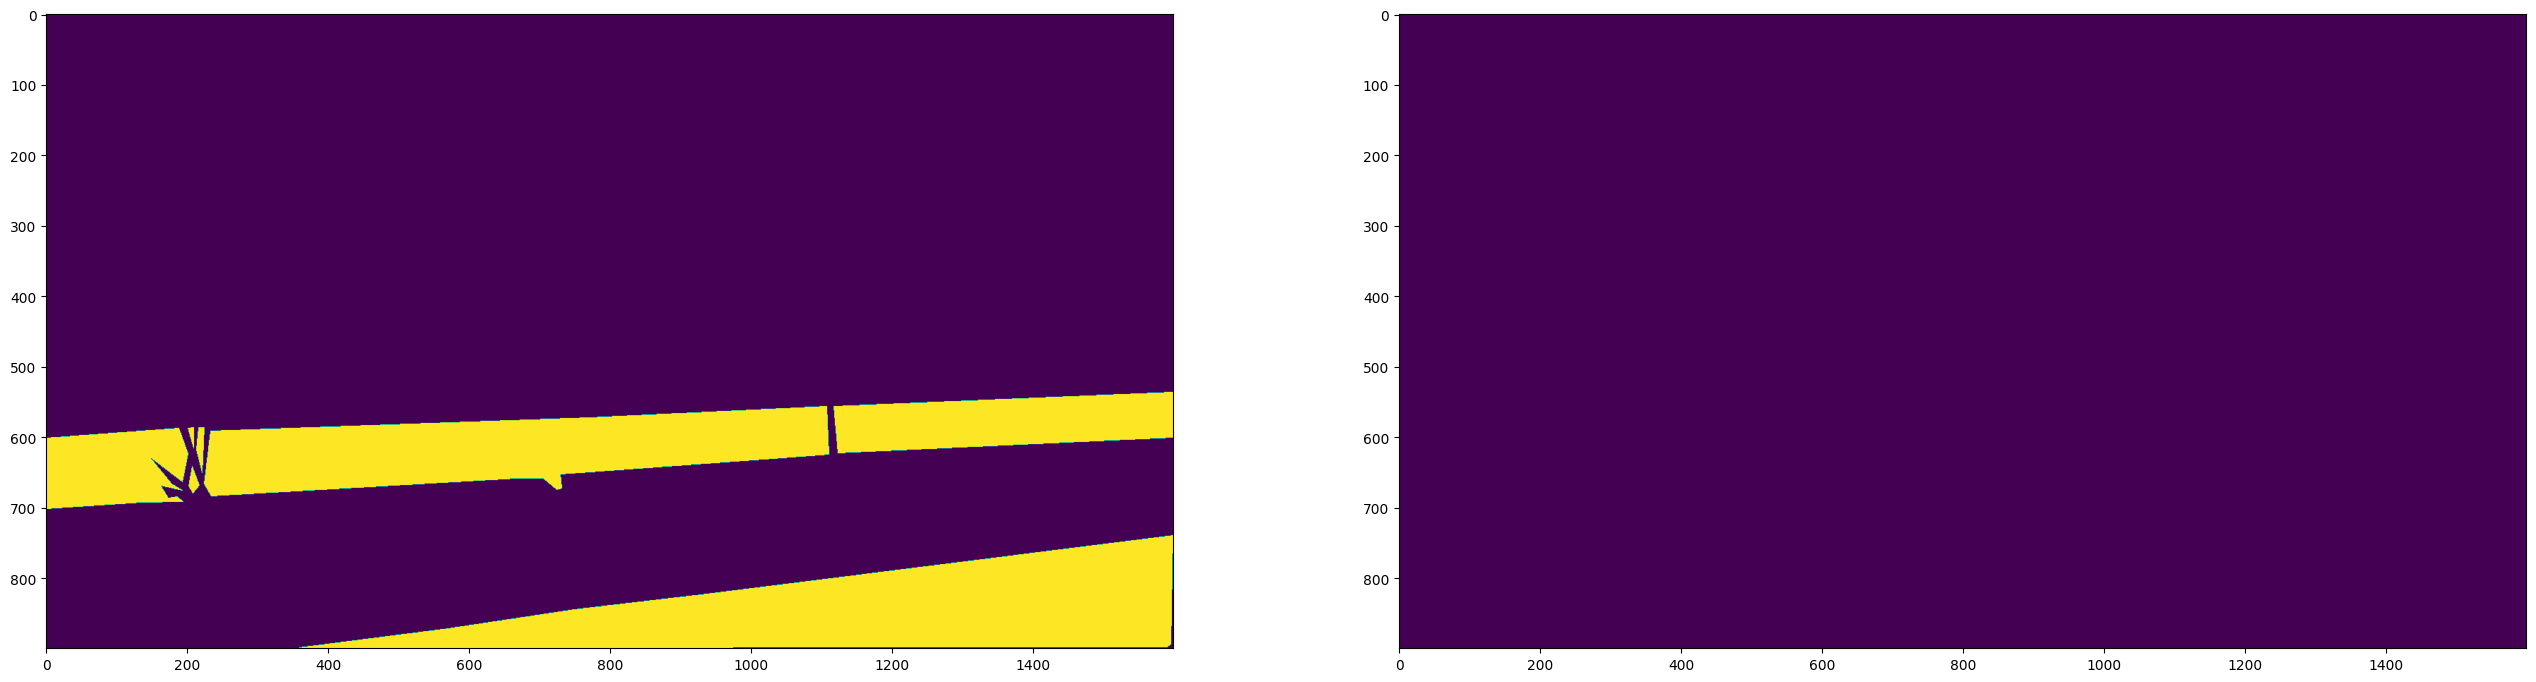

In [5]:
import matplotlib.pyplot as plt
key_camera_token = nuim.sample[0]['key_camera_token']
semantic_mask, instance_mask = nuim.get_segmentation(key_camera_token)

plt.figure(figsize=(32, 9))

plt.subplot(1, 2, 1)
plt.imshow(semantic_mask)
plt.subplot(1, 2, 2)
plt.imshow(instance_mask)

# save image
